In [ ]:
!pip install tensorflow keras_ocr opencv-python numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 727.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.5 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 5s 5s/step
Detected text: 'start' at coordinates: [82, 110, 28, 41]
Detected text: 'input' at coordinates: [80, 110, 117, 129]
Detected text: 'number' at coordinates: [73, 118, 132, 143]
Detected text: 'no' at coordinates: [234, 251, 237, 249]
Detected text: 'ls' at coordinates: [89, 101, 243, 253]
Detected text: 'number' at coordinates: [52, 94, 256, 267]
Detected text: '0' at coordinates: [96, 108, 257, 268]
Detected text: '2e0' at coordinates: [109, 142, 257, 268]
Detected text: 'yes' at coordinates: [101, 122, 319, 331]
Detected text: 'output' at coordinates: [78, 113, 368, 379]
Detected text: 'output' at coordinates: [254, 289, 368, 379]
Detected text: 'even' at coordinates: [81, 109, 382, 394]
Detected text: 'odd' at coordinates: [260, 285, 382, 395]
Detected text: 'end' at coordinates: [84, 106, 460, 471]


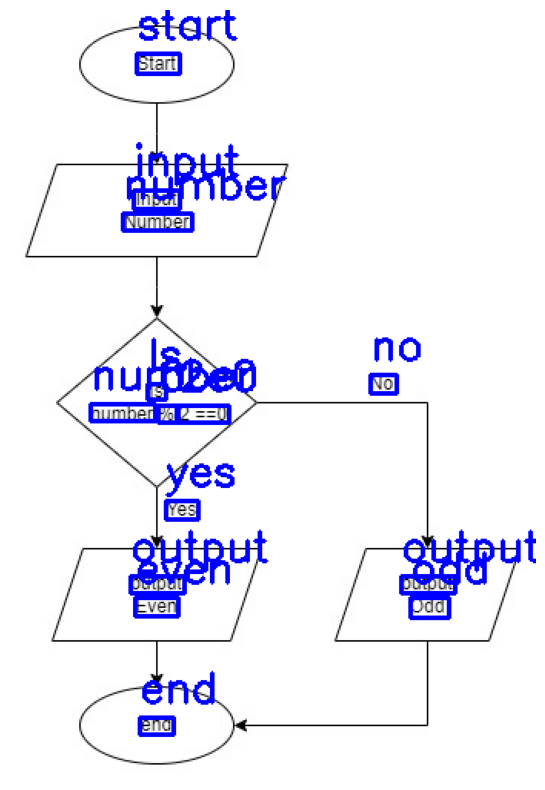

In [ ]:
# Install keras-ocr
!pip install keras-ocr

# Import necessary libraries
import os
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the TextClassifier class
class TextClassifier:
    def __init__(self):
        # Initialize keras-ocr pipeline
        self.pipeline = keras_ocr.pipeline.Pipeline()

    def __set_image(self, image_path):
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        blur = cv2.GaussianBlur(image, (5, 5), 0)
        _, image = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return image

    def __get_bbox(self, image_path):
        images = keras_ocr.tools.read(image_path)
        self.image = images
        prediction_groups = self.pipeline.recognize([images])
        texts, results = [], []

        for ibox in prediction_groups[0]:
            box = ibox[1]
            texts.append(ibox[0])
            xs, ys = set(), set()
            for x in box:
                xs.add(x[0])
                ys.add(x[1])
            results.append(list(map(int, [min(xs), min(ys), max(xs), max(ys)]))) # ymin, xmin, ymax, xmax

        return results, texts

    def recognize(self, image_path):
        boxes, texts = self.__get_bbox(image_path)
        nodes = []

        for box, text in zip(boxes, texts):
            xmin, ymin, xmax, ymax = box
            nodes.append({'text': text, 'coordinate': [xmin, xmax, ymin, ymax]})

        return nodes

if __name__ == "__main__":
    # Initialize the classifier
    classifier = TextClassifier()

    # Path to the image in Google Drive
    image_path = '/content/drive/MyDrive/Given_FlowCharts/System_Generated/4107.jpg'

    # Recognize text in the image
    nodes = classifier.recognize(image_path)

    # Process the results and print the extracted text with coordinates
    for node in nodes:
        print(f"Detected text: '{node['text']}' at coordinates: {node['coordinate']}")

    # Optionally, display the image with bounding boxes
    image = cv2.imread(image_path)
    for node in nodes:
        xmin, xmax, ymin, ymax = node['coordinate']
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        cv2.putText(image, node['text'], (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 7.3 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu

Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 5s 5s/step
Detected text: 'select' at coordinates: [485, 620, 63, 107]
Detected text: 'right' at coordinates: [641, 741, 64, 114]
Detected text: 'Start' at coordinates: [378, 477, 67, 104]
Detected text: 'input:' at coordinates: [449, 575, 385, 439]
Detected text: 'self' at coordinates: [586, 666, 388, 427]
Detected text: 'index' at coordinates: [632, 755, 706, 751]
Detected text: 'self.' at coordinates: [515, 608, 709, 752]
Detected text: '(Tr,' at coordinates: [365, 408, 714, 755]
Detected text: 'Cc)' at coordinates: [419, 461, 713, 754]
Detected text: '' at coordinates: [475, 504, 717, 745]
Detected text: 'index(r,' at coordinates: [526, 694, 1023, 1081]
Detected text: 'self.' at coordinates: [258, 343, 1032, 1070]
Detected text: 'select' at coordinates: [374, 508, 1033, 1071]
Detected text: '(c + 1))' at coordinates: [703, 859, 1032, 1078]
Detected text: 'end' at coordinates: [386, 468, 1352, 1392]


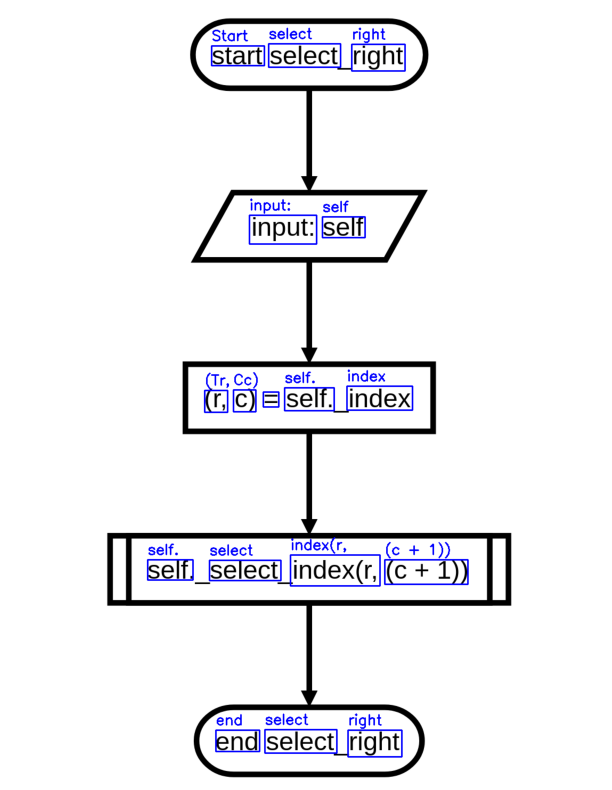

In [ ]:
# Install necessary libraries
!pip install keras-ocr
!apt-get install tesseract-ocr
!pip install pytesseract

# Import necessary libraries
import os
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import numpy as np
import pytesseract
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the TextClassifier class
class TextClassifier:
    def __init__(self):
        # Initialize keras-ocr pipeline
        self.pipeline = keras_ocr.pipeline.Pipeline()
        # Set Tesseract OCR config for recognizing mathematical symbols
        self.tesseract_config = '--oem 1 --psm 6'

    def __set_image(self, image_path):
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        blur = cv2.GaussianBlur(image, (5, 5), 0)
        _, image = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return image

    def __get_bbox(self, image_path):
        images = keras_ocr.tools.read(image_path)
        self.image = images
        prediction_groups = self.pipeline.recognize([images])
        texts, results = [], []

        for ibox in prediction_groups[0]:
            box = ibox[1]
            texts.append(ibox[0])
            xs, ys = set(), set()
            for x in box:
                xs.add(x[0])
                ys.add(x[1])
            results.append(list(map(int, [min(xs), min(ys), max(xs), max(ys)]))) # ymin, xmin, ymax, xmax

        return results, texts

    def __recognize_text(self, image, bbox):
        xmin, ymin, xmax, ymax = bbox
        roi = image[ymin:ymax, xmin:xmax]
        text = pytesseract.image_to_string(roi, config=self.tesseract_config)
        return text.strip()

    def recognize(self, image_path):
        image = self.__set_image(image_path)
        boxes, _ = self.__get_bbox(image_path)
        nodes = []

        for box in boxes:
            text = self.__recognize_text(image, box)
            xmin, ymin, xmax, ymax = box
            nodes.append({'text': text, 'coordinate': [xmin, xmax, ymin, ymax]})

        return nodes

if __name__ == "__main__":
    # Initialize the classifier
    classifier = TextClassifier()

    # Path to the image in Google Drive
    image_path = '/content/drive/MyDrive/Flow_Chart_Code/Flow_Chart_code/Test/png/10106.png'

    # Recognize text in the image
    nodes = classifier.recognize(image_path)

    # Process the results and print the extracted text with coordinates
    for node in nodes:
        print(f"Detected text: '{node['text']}' at coordinates: {node['coordinate']}")

    # Optionally, display the image with bounding boxes
    image = cv2.imread(image_path)
    for node in nodes:
        xmin, xmax, ymin, ymax = node['coordinate']
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        cv2.putText(image, node['text'], (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
